Пунк №1 - Выбор начальных условий.(повтор)

---



Датасет классификации - https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data

Обоснование выбора датасета классификации:

Ожирение - глобальная проблема здравоохранения, затрагивающая более 650 миллионов человек по всему миру. Особенно актуальной её делает наш сидячий образ жизни. Прогнозирование уровня ожирения помогает в ранней диагностике и профилактике болезней,вызываемых лишним весом, разработке персонализированных программ лечения, оптимизации ресурсов здравоохранения, улучшения качества предоставляемой медецинским работником помощи.

Датасет регресии - https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast/data

Обоснование выбора датасета регрессии:

Прогнозирование продаж - ключевая задача в области торговли, которая давно решается с использованием алгоритмов ML, ибо это позволяет обеспечить оптимизации управления запасами, планирования персонала,управления цепочками поставок,финансового планирования филиала и всей торговой сети в целом. Walmart - крупнейший ритейлер, и анализ данных его продаж позволит выработать методы работы с типовыми для отрасли данными, которые могут быть в дальнейшем применены к другим ритейлерам.

ИСПОЛЬЗУЕМЫЕ МЕТРИКИ:

Для классификации (Obesity Levels):
Accuracy (Точность)

Обоснование: Базовая метрика для общей оценки модели

Формула: (TP + TN) / (TP + TN + FP + FN)

Применение: Общее качество классификации всех уровней ожирения

F1-Score

Обоснование: Важно при несбалансированных классах, объединяет precision и recall

Формула: 2 × (Precision × Recall) / (Precision + Recall)

Применение: Баланс между ложными срабатываниями и пропусками

Confusion Matrix (Матрица ошибок)

Обоснование: Визуализация ошибок классификации по всем классам

Применение: Анализ, какие уровни ожирения путает модель

Macro/Micro Precision и Recall

Macro: Обоснование - равное внимание к каждому классу, важно для медицинской диагностики

Micro: Обоснование - учет размера классов, общая эффективность

Применение: Комплексная оценка multi-class классификации

Для регрессии (Walmart Sales):
R² (Коэффициент детерминации)

Обоснование: Показывает долю дисперсии, объясненную моделью

Формула: 1 - (SS_res / SS_tot)

Применение: Общая объясняющая способность модели

MSE (Mean Squared Error)

Обоснование: Широко используется, чувствителен к выбросам

Формула: (1/n) × Σ(y_i - ŷ_i)²

Применение: Общая ошибка прогноза

MAE (Mean Absolute Error)

Обоснование: Легко интерпретировать, устойчив к выбросам

Формула: (1/n) × Σ|y_i - ŷ_i|

Применение: Средняя абсолютная ошибка в долларах



Применение: Процентная ошибка прогноза

RMSE (Root Mean Squared Error)

Обоснование: Сохраняет единицы измерения, как MAE

Формула: √MSE

Применение: Стандартное отклонение ошибок

Классификация

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
fatemehmehrparvar_obesity_levels_path = kagglehub.dataset_download('fatemehmehrparvar/obesity-levels')

print('Data source import complete.')


Using Colab cache for faster access to the 'obesity-levels' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv


In [ ]:
df =  pd.read_csv('/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv')


#общаяя информация о таблице
df.info()
print(df.isnull().sum()) # смотрим на пропуски
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
#Посмотрим на значения в object столбцах, ибо возможно null в виде строки лежит
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())
    print()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

FAVC
yes    1866
no      245
Name: count, dtype: int64

SCC
no     2015
yes      96
Name: count, dtype: int64

SMOKE
no     2067
yes      44
Name: count, dtype: int64

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64



Как можно увидеть, тут нет null значений, только object столбцы - заменим их на onecode  enocoding,дабы модель могла сработать в baseline. Для таргета

In [ ]:
df.select_dtypes(include=['object']).columns
print(df.select_dtypes(include=['object']).columns)

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [ ]:
df = pd.get_dummies(df,columns=['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS'],drop_first=True)
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight,False,...,False,False,True,False,True,False,False,False,True,False
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight,False,...,True,True,True,False,True,False,False,False,True,False
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight,True,...,False,False,True,False,True,False,False,False,True,False
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight_Level_I,True,...,False,False,False,False,True,False,False,False,False,True
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,Overweight_Level_II,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,Obesity_Type_III,False,...,False,False,True,False,True,False,False,False,True,False
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,Obesity_Type_III,False,...,False,False,True,False,True,False,False,False,True,False
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,Obesity_Type_III,False,...,False,False,True,False,True,False,False,False,True,False
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,Obesity_Type_III,False,...,False,False,True,False,True,False,False,False,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   NObeyesdad                          2111 non-null   object 
 9   Gender_Male                         2111 non-null   bool   
 10  CALC_Frequently                     2111 non-null   bool   
 11  CALC_Sometimes                      2111 no

In [ ]:
#Выделяем признаки и таргет
X = df.drop('NObeyesdad', axis=1)  # Все признаки кроме таргета
y = df['NObeyesdad']  # Таргетная переменная

In [ ]:
#Закодируем через Label encoding результирующую переменную,дабы принял алгоритм

In [ ]:
le = LabelEncoder()
y_transformed = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)

In [ ]:
print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер тренировочной выборки: (1688, 23)
Размер тестовой выборки: (423, 23)


In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier,SGDOneClassSVM
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [ ]:
logreg_model = SGDClassifier()#Linear classifiers (SVM, logistic regression, etc.) with SGD training. - возьмём его за основу.
logreg_model.fit(X_train, y_train)

SGDClassifier()

In [ ]:
y_pred = logreg_model.predict(X_test)

# Метрики для Логистической регрессии
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred, average='weighted')

print("SGD Baseline Results:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

SGD Baseline Results:
Accuracy: 0.4634
F1-Score: 0.3912

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.11      0.20        54
      Normal_Weight       0.46      0.10      0.17        58
     Obesity_Type_I       0.00      0.00      0.00        70
    Obesity_Type_II       0.79      0.98      0.87        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.22      0.98      0.36        58
Overweight_Level_II       0.57      0.07      0.12        58

           accuracy                           0.46       423
          macro avg       0.56      0.46      0.39       423
       weighted avg       0.55      0.46      0.39       423



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


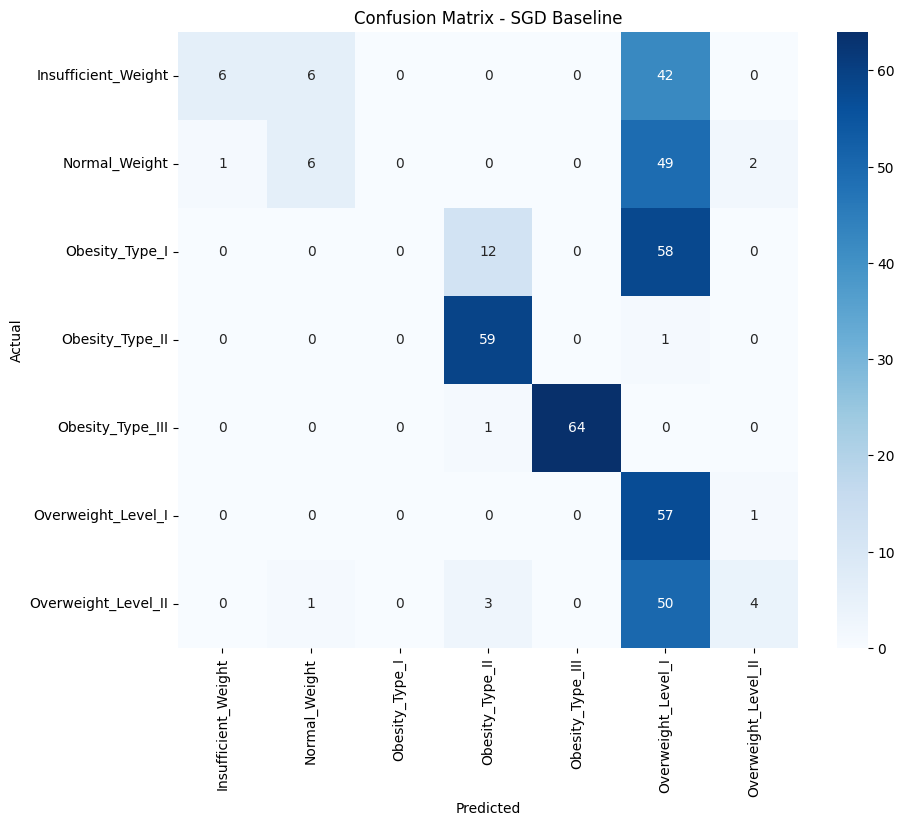

In [ ]:
# Матрица ошибок
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - SGD Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Улучшим baseline
#Гипотезы:
#0 Увеличим max_iter
#1 Добавление  scaler для нормализации числовых признаков улучшит производительность
#2 Можно варировать гиперпараметры, используя grid search, для получения лучших метрик
#3 Можно сделать дополнительный признак в виде возрастных групп  и дополнительный признак в виде индекса массы тела(BMI)
#4 Можно избавиться от высоко корелирующих признаков(>0.9)

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
# Отключаем только предупреждения о несходимости(без scaler не сойдется)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#0 Увеличим max_iter
iters= {
    '100': 100,
    '1000': 1000,
    '2000': 2000,

}
for name,iter in iters.items():


    scores = cross_val_score(SGDClassifier(loss='log_loss', max_iter=iter, random_state=42), X_train, y_train, cv=5, scoring='accuracy')#изменим max_iter, дабы дать больше(10 ввел для чистоты эксперимента) времени на сходимость модели
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")

# Включаем обратно предупреждения
warnings.filterwarnings("default", category=ConvergenceWarning)


100: 0.4040 ± 0.0609
1000: 0.3939 ± 0.0700
2000: 0.3939 ± 0.0700


Гипотеза подтвердилась: увеличение max_iter дает больше времени модели для того, чтобы сойтись, но не решает проблему со сходимостью.

In [ ]:
# Гипотеза 1: Нормализация
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Разные методы нормализации
scalers = {
    'NONE': None,
    'StandardScaler': StandardScaler(), #(x - mean) / sqrt(disp)
    'MinMaxScaler': MinMaxScaler(),  #(X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) *(max - min) + min
    'RobustScaler': RobustScaler() #(x-median)/(x25-x75)
}
print("\nГипотеза 1: Нормализация ")
for name, scaler in scalers.items():

    if name != 'NONE':
        X_scaled = scaler.fit_transform(X_train)
    else:
        X_scaled = X_train
    scores = cross_val_score(SGDClassifier(loss='log_loss', max_iter=2000, random_state=42), X_scaled, y_train, cv=5, scoring='accuracy')#увеличим max_iter с 100 до 10000, дабы дать больше времени на сходимость модели
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")
warnings.filterwarnings("default", category=ConvergenceWarning)


Гипотеза 1: Нормализация 
NONE: 0.3939 ± 0.0700
StandardScaler: 0.7020 ± 0.0277
MinMaxScaler: 0.6997 ± 0.0497
RobustScaler: 0.7163 ± 0.0314


Гипотеза подтвердилась: в отличие от KNN Нормализация данных уравнивает значимость признаков для модели, что позволяет ей более осмысленно работать с признаками, имеющими различный разброс.

In [ ]:
#2 Гипотеза 2: Подбор оптимальных гиперпараметров
from sklearn.pipeline import Pipeline
print("\nГипотеза 2: Подбор оптимальных гиперпараметров")
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('sgd', SGDClassifier(loss='log_loss', max_iter=5000, random_state=42))
])

# Параметры для GridSearch
param_grid = [
    # 1. learning_rate = 'optimal' → eta0 не требуется (игнорируется)
    {
        'sgd__penalty': ['l2', None],
        'sgd__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1.0],
        'sgd__learning_rate': ['optimal']

    },
    # 2. learning_rate = 'constant' → eta0 > 0
    {
        'sgd__penalty': ['l2', None],
        'sgd__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1.0],
        'sgd__learning_rate': ['constant'],
        'sgd__eta0': [0.01, 0.1, 1.0]  # только положительные!
    },
    # 3. penalty = 'l1' (обычно с optimal)
    {
        'sgd__penalty': ['l1'],
        'sgd__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1.0],
        'sgd__learning_rate': ['optimal']
    },
    # 4. elasticnet
    {
        'sgd__penalty': ['elasticnet'],
        'sgd__alpha': [1e-4, 1e-3, 1e-2],
        'sgd__l1_ratio': [0.15, 0.3, 0.5, 0.7, 0.9],
        'sgd__learning_rate': ['optimal']
    },
    # 5. elasticnet с constant (опционально, но редко используется)
    {
        'sgd__penalty': ['elasticnet'],
        'sgd__alpha': [1e-4, 1e-3, 1e-2],
        'sgd__l1_ratio': [0.15, 0.3, 0.5, 0.7, 0.9],
        'sgd__learning_rate': ['constant'],
        'sgd__eta0': [0.01, 0.1]
    }
]

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    error_score='raise'
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")



Гипотеза 2: Подбор оптимальных гиперпараметров
Best parameters: {'sgd__alpha': 0.001, 'sgd__learning_rate': 'optimal', 'sgd__penalty': 'l1'}
Best CV score: 0.7802


Гипотеза подтвердилась: по сравнению со стандартными  значением при Scaler, accuracy возрасло на 0,09+

In [ ]:
# Гипотеза 3: Feature Engineering
print("\nГипотеза 3: Feature Engineering")
def prepare_features(df):
    df_processed = df.copy()

    # BMI категории
    def bmi_category(bmi):
        if bmi < 18.5: return 0
        elif 18.5 <= bmi < 25: return 1
        elif 25 <= bmi < 30: return 2
        elif 30 <= bmi < 35: return 3
        elif 35 <= bmi < 40: return 4
        else: return 5

    # Возрастные группы
    def age_group(age):
        if age < 20: return 0
        elif 20 <= age < 30: return 1
        elif 30 <= age < 45: return 2
        elif 45 <= age < 60: return 3
        else: return 4

    # Создаем новые признаки
    df_processed['BMI_category'] =  df_processed['Weight'] / (df_processed['Height'] ** 2)
    df_processed['Age_group'] = df_processed['Age'].apply(age_group)


    return df_processed
scal = RobustScaler()
names = ['NONE','new_params']
for name in names:
  if name !='NONE':
    X_train_enhanced = prepare_features(X_train)

  else :
    X_train_enhanced = X_train
  X_train_enhanced=scal.fit_transform(X_train_enhanced)
  scores = cross_val_score(SGDClassifier(loss='log_loss', max_iter=100, random_state=42), X_train_enhanced, y_train, cv=5, scoring='accuracy')
  print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


Гипотеза 3: Feature Engineering
NONE: 0.7163 ± 0.0314
new_params: 0.7163 ± 0.0313


Гипотеза не подтвердилась: по сравнению с исходными признаками, accuracy  не улучшилось


Гипотеза 4: 


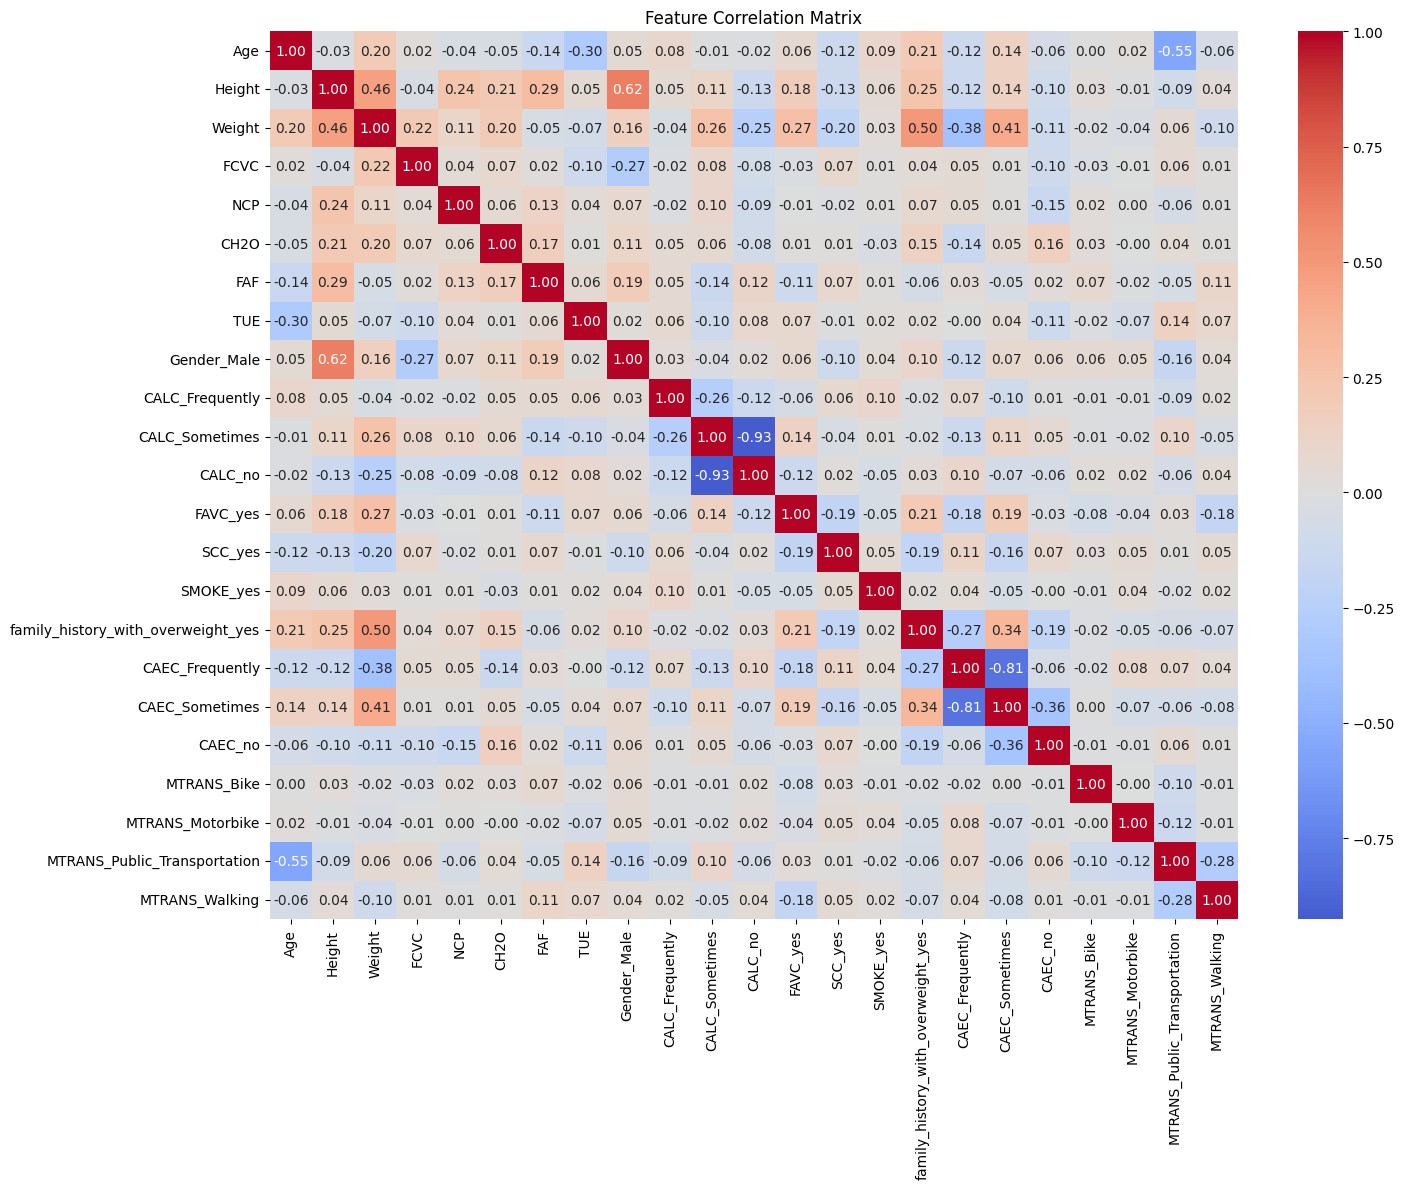

Features to drop due to high correlation: ['CALC_no', 'CAEC_Sometimes']


In [ ]:
print("\nГипотеза 4: ")

plt.figure(figsize=(15, 12))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Посмотрим на высоко коррелированные признаки (>0.80)
corr_matrix = df.corr(numeric_only=True).abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print(f"Features to drop due to high correlation: {to_drop}")

Визуализировав данные, мы убеждаемся, что меж собой корелируют лишь столбцы, полученные через onehot encoding с другими вариантами ответа, что говорит о редкости получения отрицательных вариантов в этой категории. Гипотеза опровергнута: признаки не являются мультиколлинеарными

In [ ]:
#Улучшенный baseline
#X = prepare_features(df.drop('NObeyesdad', axis=1))  # Все признаки кроме таргета
X=df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']  # Таргетная переменная
le = LabelEncoder()
y_transformed = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)

In [ ]:
pipeline = Pipeline([ # улучшенная модель
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(
        loss='log_loss',
        penalty='l1',
        alpha=0.001,
        learning_rate='optimal',
        max_iter=5000,
        random_state=42
    ))
])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 SGDClassifier(alpha=0.001, loss='log_loss', max_iter=5000,
                               penalty='l1', random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

# Метрики для baseline
pipeline_accuracy = accuracy_score(y_test, y_pred)
pipeline_f1 = f1_score(y_test, y_pred, average='weighted')

print("LogisticRegression Baseline Results:")
print(f"Accuracy: {pipeline_accuracy:.4f}")
print(f"F1-Score: {pipeline_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

LogisticRegression Baseline Results:
Accuracy: 0.7707
F1-Score: 0.7690

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      1.00      0.99        54
      Normal_Weight       0.73      0.62      0.67        58
     Obesity_Type_I       0.65      0.76      0.70        70
    Obesity_Type_II       0.97      0.97      0.97        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.54      0.60      0.57        58
Overweight_Level_II       0.54      0.45      0.49        58

           accuracy                           0.77       423
          macro avg       0.77      0.77      0.77       423
       weighted avg       0.77      0.77      0.77       423



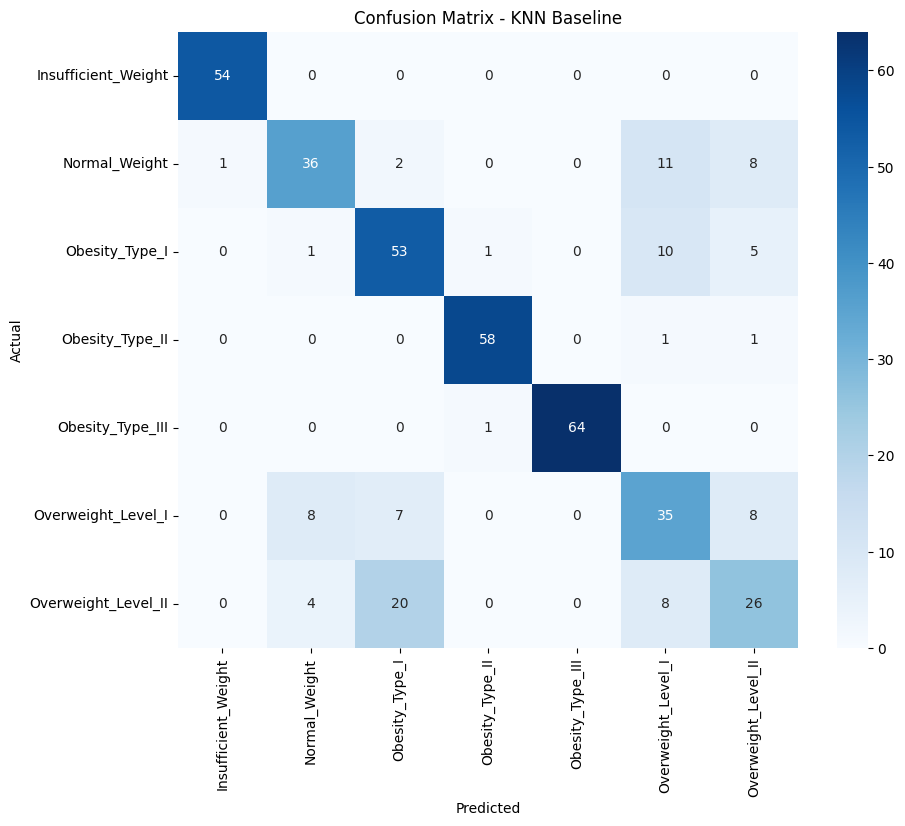

In [ ]:
# Матрица ошибок
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix - KNN Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Будем реализовывать 1vsall - вначале - базовую регресиию, обученную на предсказания значений одного из классов, потом построим логиты на их основе и выберем с наибольшим значение.
class MyLogistic_LinearRegression:
    def __init__(self, learning_rate=0.001, num_iterations=15000, alpha=0.001):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.alpha = alpha  # L2 регуляризация (соответствует alpha в SGDClassifier)

    def fit(self, X_in, y):
        X_in = X_in.astype(float)
        n_samples, n_features = X_in.shape
        self.bias = 0.0
        self.weights = np.random.normal(0, 0.01, n_features)  # небольшой шум

        for i in range(self.num_iterations):
            linear_model = np.dot(X_in, self.weights) + self.bias
            linear_model = np.clip(linear_model, -500, 500) #для предотвращения учёта выбросов
            sigmoid = 1 / (1 + np.exp(-linear_model)) #сигмойда в качестве функции активации, преобразует помежуточное предсказание в дапазоне [0;1]

            db = (1 / n_samples) * np.sum(sigmoid - y) # вычисления градиента
            dw = (1 / n_samples) * np.dot(X_in.T, (sigmoid - y)) + self.alpha * self.weights

            self.weights -= self.learning_rate * dw #обновление весов
            self.bias -= self.learning_rate * db

    def decision_function(self, X_in_test): #предсказание значения линейной функции для нашего классса
        X_in_test = np.array(X_in_test, dtype=float)
        return np.dot(X_in_test, self.weights) + self.bias

    def predict_probability(self, X_in_test):
        linear = self.decision_function(X_in_test)
        return 1 / (1 + np.exp(-np.clip(linear, -500, 500)))

    def predict(self, X_in_test):
        proba = self.predict_probability(X_in_test)
        return (proba >= 0.5).astype(int)




In [ ]:
class My1vallLogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=5000, alpha=0.001):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.models = []
        self.classes_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)#выбираем все уникальные классы
        self.models = []
        for cls in self.classes_:
            y_binary = (y == cls).astype(int) #учим каждую модель определять свой класс
            model = MyLogistic_LinearRegression(
                learning_rate=self.learning_rate,
                num_iterations=self.num_iterations,
                alpha=self.alpha
            )
            model.fit(X, y_binary)
            self.models.append(model)

    def predict(self, X):
        # ИСПОЛЬЗУЕМ ЛОГИТЫ  для выбора класса!
        logits = np.array([model.decision_function(X) for model in self.models]).T
        return self.classes_[np.argmax(logits, axis=1)]

In [ ]:
#Cтандартный baseline
X = df.drop('NObeyesdad', axis=1)  # Все признаки кроме таргета
y = df['NObeyesdad']  # Таргетная переменная
le = LabelEncoder()
y_transformed = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)

In [ ]:

my_baseline = My1vallLogisticRegression()


my_baseline.fit(X_train, y_train)

In [ ]:
y_pred =my_baseline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(" Baseline Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

 Baseline Results:
Accuracy: 0.5816
F1-Score: 0.5593

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.71      0.87      0.78        54
      Normal_Weight       0.54      0.34      0.42        58
     Obesity_Type_I       0.44      0.47      0.46        70
    Obesity_Type_II       0.75      0.77      0.76        60
   Obesity_Type_III       0.64      1.00      0.78        65
 Overweight_Level_I       0.61      0.33      0.43        58
Overweight_Level_II       0.31      0.28      0.29        58

           accuracy                           0.58       423
          macro avg       0.57      0.58      0.56       423
       weighted avg       0.57      0.58      0.56       423



Вывод:как мы можем увидеть, полученная мною реализация превосходит базовую  библиотечную за счёт использования логитов , clippingа для предотвращения роста по модулю значений во время обучения и добавления L2 регуляризации в саму модель. Особенно важным являются первые две модификации, позволяющие получать более стабильные итерации при обучении базовой регресиии

In [ ]:
#Улучшенный

In [ ]:
#Улучшенный baseline
#X = prepare_features(df.drop('NObeyesdad', axis=1))  # Все признаки кроме таргета
X=df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']  # Таргетная переменная
le = LabelEncoder()
y_transformed = le.fit_transform(y)

In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
my_model = My1vallLogisticRegression(learning_rate=0.1, num_iterations=5000)
my_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = my_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(" Baseline Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

 Baseline Results:
Accuracy: 0.7305
F1-Score: 0.7192

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.81      0.96      0.88        54
      Normal_Weight       0.64      0.48      0.55        58
     Obesity_Type_I       0.61      0.70      0.65        70
    Obesity_Type_II       0.78      0.97      0.87        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.64      0.59      0.61        58
Overweight_Level_II       0.56      0.41      0.48        58

           accuracy                           0.73       423
          macro avg       0.72      0.73      0.72       423
       weighted avg       0.72      0.73      0.72       423



Вывод:как мы можем увидеть, полученная мною реализация сравнима с библиотечной с подобранными гиперпараметрами, что говорит о правильности моей интерпретации линейного алгоритма классификации, несомтря на отсутствие некторых параметров из обилия библиотечной релизации

In [ ]:
#РЕГРЕССИЯ

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
aslanahmedov_walmart_sales_forecast_path = kagglehub.dataset_download('aslanahmedov/walmart-sales-forecast')

print('Data source import complete.')

Using Colab cache for faster access to the 'walmart-sales-forecast' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-forecast/features.csv
/kaggle/input/walmart-sales-forecast/stores.csv
/kaggle/input/walmart-sales-forecast/train.csv
/kaggle/input/walmart-sales-forecast/test.csv
/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv


In [ ]:

features = pd.read_csv("/kaggle/input/walmart-sales-forecast/features.csv")
stores = pd.read_csv("/kaggle/input/walmart-sales-forecast/stores.csv")
train = pd.read_csv("/kaggle/input/walmart-sales-forecast/train.csv")
test = pd.read_csv("/kaggle/input/walmart-sales-forecast/test.csv")


In [ ]:
#общаяя информация о таблице фичей
features.info()
print(features.isnull().sum()) # смотрим на пропуски
print("Features Dataset shape:", features.shape)
features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemploy

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
#общаяя информация о таблице train
stores.info()
print(stores.isnull().sum()) # смотрим на пропуски
stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
Store    0
Type     0
Size     0
dtype: int64


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
#общаяя информация о таблице train
train.info()
print(train.isnull().sum()) # смотрим на пропуски
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
#общаяя информация о таблице test
test.info()
print(test.isnull().sum()) # смотрим на пропуски
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
#Все столбцы с датами переведём из object к  более удобному datetime
for df in [features, train, test]:
    df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
train = train.merge(features, on=["Store", "Date", "IsHoliday"], how="left")#sql left join
train = train.merge(stores, on="Store", how="left")#sql left join

test = test.merge(features, on=["Store", "Date", "IsHoliday"], how="left") #sql left join
test = test.merge(stores, on="Store", how="left")#sql left join

In [ ]:
train_combined = train.copy()
test_combined = test.copy()


In [ ]:
train_combined.fillna(0, inplace=True)
test_combined.fillna(0, inplace=True)

In [ ]:
train_combined = pd.get_dummies(train_combined, columns=['Type'], prefix='Type')
test_combined = pd.get_dummies(test_combined, columns=['Type'], prefix='Type')

In [ ]:
train_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Size          421570 non-null  int64         
 15  Type_A        421

In [ ]:
#Бьем date на временные признаки для характеристики даты и отказа от строковой записи
for df in [train_combined, test_combined]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek

In [ ]:
feature_columns = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3',
    'MarkDown4', 'MarkDown5', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_combined.columns if col.startswith('Type_')] #все фичи, без DATe+ target

In [ ]:
available_features = [col for col in feature_columns if col in train_combined.columns]
print(f"Used features: {available_features}")

Used features: ['Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Year', 'Month', 'Week', 'DayOfWeek', 'Type_A', 'Type_B', 'Type_C']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_reg = train_combined[available_features]
y_reg = train_combined['Weekly_Sales']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Размер тренировочной выборки: {X_train_reg.shape}")
print(f"Размер тестовой выборки: {X_test_reg.shape}")



Размер тренировочной выборки: (337256, 20)
Размер тестовой выборки: (84314, 20)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Обучаем  регрессию из sklearn


# Бейзлайн  Линейной регрессия
knn_regressor = LinearRegression()
knn_regressor.fit(X_train_reg, y_train_reg)


LinearRegression()

In [ ]:

y_pred_reg = knn_regressor.predict(X_test_reg)

#Оценка качества модели регрессии
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Рассчитываем метрики
r2 = r2_score(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print("\n" + "="*50)
print("Линейная РЕГРЕССИЯ - РЕЗУЛЬТАТЫ БЕЙЗЛАЙНА")
print("="*50)
print(f"R² (Коэффициент детерминации): {r2:.4f}")
print(f"MSE (Средняя квадратичная ошибка): {mse:.4f}")
print(f"MAE (Средняя абсолютная ошибка): {mae:.4f}")
print(f"MAPE (Средняя абсолютная процентная ошибка): {mape:.4f}")
print(f"RMSE (Среднеквадратичная ошибка): {rmse:.4f}")



Линейная РЕГРЕССИЯ - РЕЗУЛЬТАТЫ БЕЙЗЛАЙНА
R² (Коэффициент детерминации): 0.0926
MSE (Средняя квадратичная ошибка): 473169236.2096
MAE (Средняя абсолютная ошибка): 14561.3542
MAPE (Средняя абсолютная процентная ошибка): 11766113046842188.0000
RMSE (Среднеквадратичная ошибка): 21752.4536


In [ ]:
#Улучшим baseline
#Гипотезы:
#1 Обработать выбросы в датасете, что позволит более точно выделить зависимость
#2 Можно заменять данные на о маркировке на средние и/или удалить строки или стобцы с ними и сравнить результаты(обработка выбросов)
#3 Добавление  scaler для нормализации числовых признаков может улучшить  метрики
#4 Можно добавить искусственнные доменные признаки, фичи, отвечающие за сезонность для улучшения обобщающей способности модели


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{model_name}")
    print("="*50)
    print(f"R²: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.4f}")
    print(f"RMSE: {rmse:.2f}")

    return r2, mse, mae, mape, rmse

In [ ]:
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

Гипотеза 1: Анализ и обработка выбросов


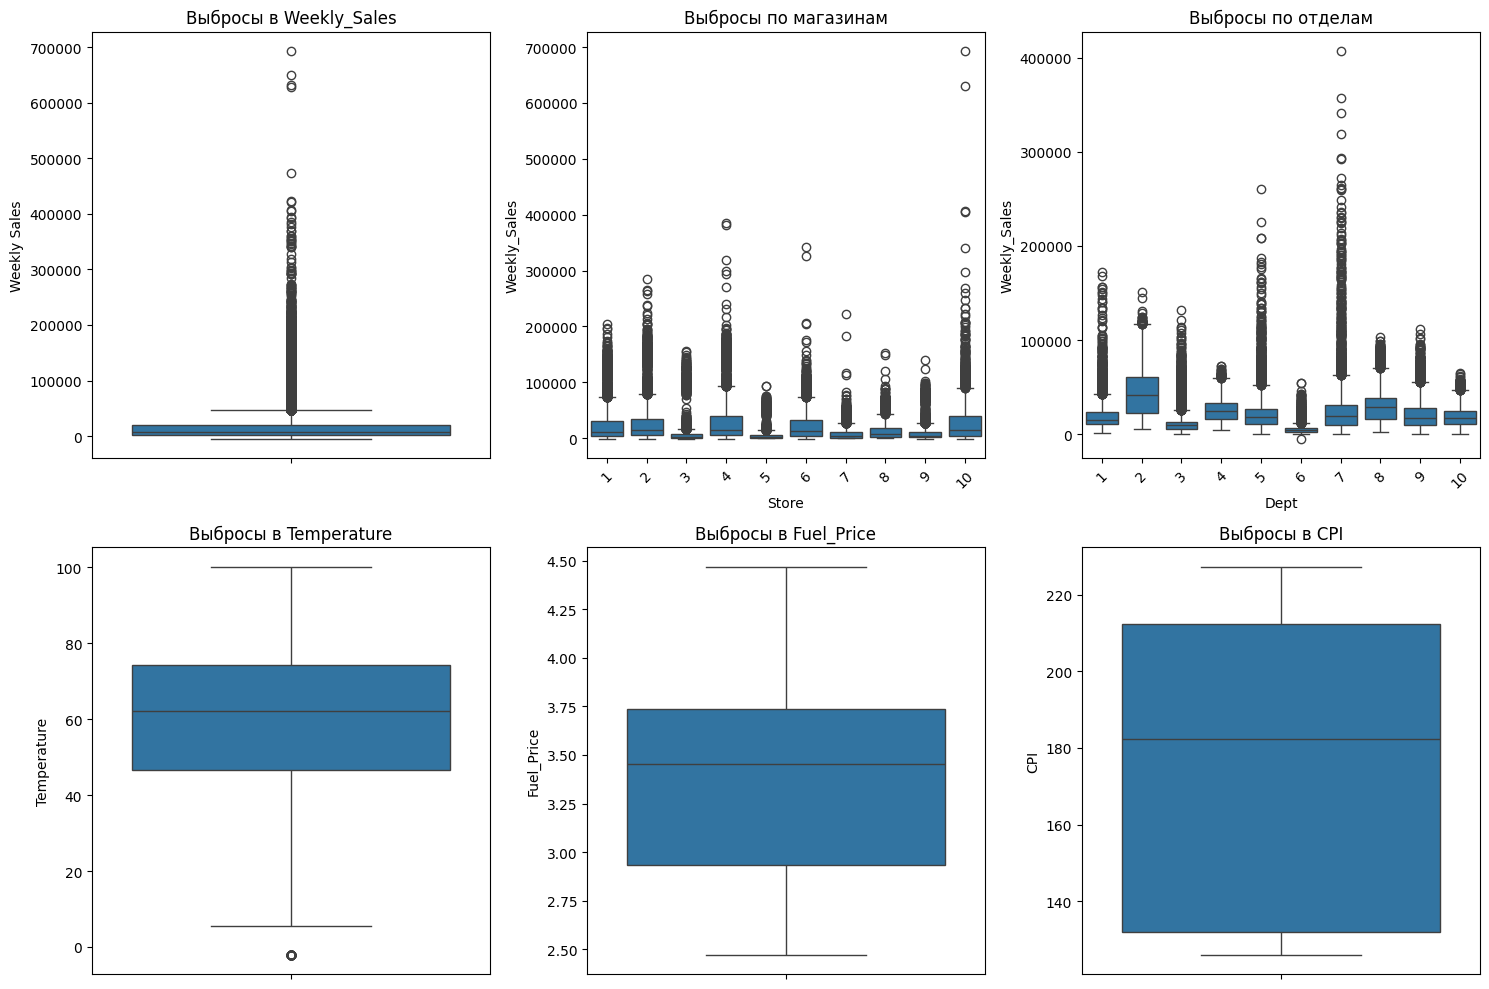


Количественный анализ выбросов (метод IQR):
Weekly_Sales   :  35521 выбросов ( 8.43%) [(-25109.65, 47395.16)]
Temperature    :     69 выбросов ( 0.02%) [(   5.28,  115.68)]
Fuel_Price     :      0 выбросов ( 0.00%) [(   1.73,    4.95)]
CPI            :      0 выбросов ( 0.00%) [(  11.43,  333.01)]
Unemployment   :  32114 выбросов ( 7.62%) [(   4.37,   11.09)]
Size           :      0 выбросов ( 0.00%) [(-69662.50, 365805.50)]

Гипотеза 1: Обработка выбросов в Weekly_Sales

Сравнение методов обработки выбросов:
Исходный размер данных: 421570
После winsorization: 421570
После удаления выбросов: 386049


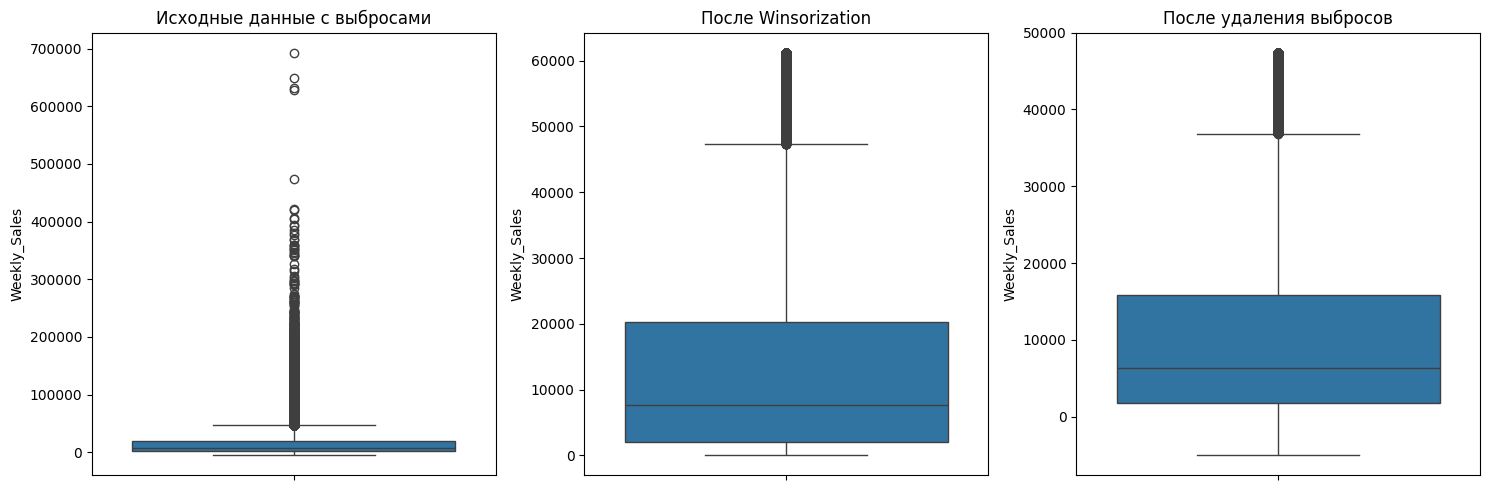


Сравнение методов обработки выбросов:
RMSE с исходными данными: 21768.1877
RMSE с winsorization: 16354.0556
RMSE с удалением выбросов: 11048.9882

 Лучший метод обработки выбросов: Удаление выбросов (RMSE = 11048.9882)

Анализ выбросов по праздничным дням:
Медиана продаж в праздники: 7947.74
Медиана продаж в обычные дни: 7589.95
Отношение: 1.05x


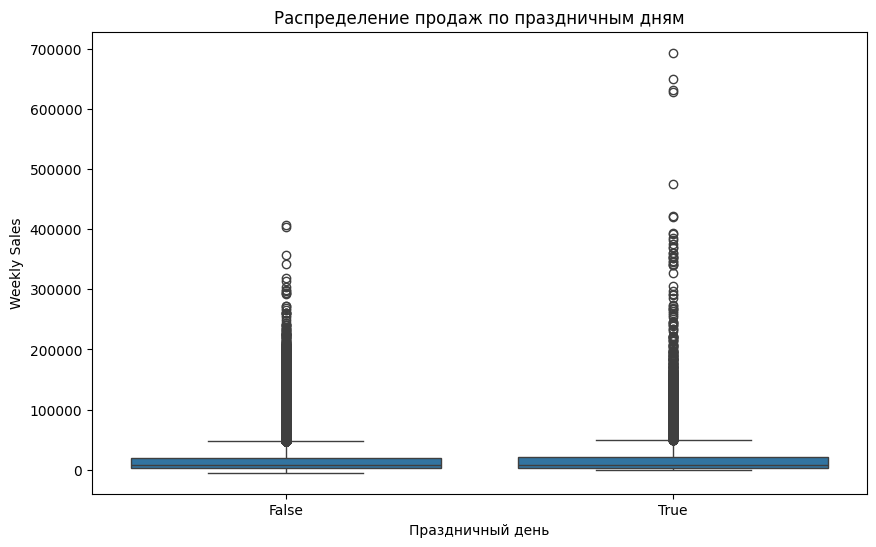


Экстремальные выбросы (>99% перцентиль): 4216 записей
Статистика по экстремальным выбросам:
  Магазины: [ 1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 31 32 34 35 39 40 41 42 43 45]
  Отделы: [ 7 38 72 90 92 95  5 82  2 23  1  3 14 18 40 46 55 16 91  9 11]
  Праздники: 9.39%


In [ ]:
# Оценка выбросов через boxplot
import matplotlib.pyplot as plt
import seaborn as sns

print("Гипотеза 1: Анализ и обработка выбросов")

# Анализ выбросов в целевой переменной
plt.figure(figsize=(15, 10))

# 1. Boxplot Weekly_Sales
plt.subplot(2, 3, 1)
sns.boxplot(y=train['Weekly_Sales'])
plt.title('Выбросы в Weekly_Sales')
plt.ylabel('Weekly Sales')

# 2. Boxplot по магазинам
plt.subplot(2, 3, 2)
sample_stores = train['Store'].unique()[:10]  # первые 10 магазинов для наглядности
sns.boxplot(data=train[train['Store'].isin(sample_stores)], x='Store', y='Weekly_Sales')
plt.title('Выбросы по магазинам')
plt.xticks(rotation=45)

# 3. Boxplot по отделам
plt.subplot(2, 3, 3)
sample_depts = train['Dept'].unique()[:10]  # первые 10 отделов
sns.boxplot(data=train[train['Dept'].isin(sample_depts)], x='Dept', y='Weekly_Sales')
plt.title('Выбросы по отделам')
plt.xticks(rotation=45)

# 4. Boxplot числовых признаков
plt.subplot(2, 3, 4)
sns.boxplot(y=train['Temperature'])
plt.title('Выбросы в Temperature')

plt.subplot(2, 3, 5)
sns.boxplot(y=train['Fuel_Price'])
plt.title('Выбросы в Fuel_Price')

plt.subplot(2, 3, 6)
sns.boxplot(y=train['CPI'])
plt.title('Выбросы в CPI')

plt.tight_layout()
plt.show()

# Количественный анализ выбросов
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\nКоличественный анализ выбросов (метод IQR):")
numeric_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

for col in numeric_columns:
    if col in train.columns:
        outliers_count, lower, upper = detect_outliers_iqr(train, col)
        percentage = (outliers_count / len(train)) * 100
        print(f"{col:<15}: {outliers_count:>6} выбросов ({percentage:5.2f}%) [({lower:7.2f}, {upper:7.2f})]")

# Гипотеза: Обработка выбросов в целевой переменной
print("\nГипотеза 1: Обработка выбросов в Weekly_Sales")

# Создаем копии для экспериментов с выбросами
train_no_outliers = train.copy()
test_no_outliers = test.copy()

# Метод 1: Winsorization (ограничение выбросов)
def winsorize_series(series, limits=(0.05, 0.05)):
    """Ограничивает выбросы перцентилями"""
    lower_limit = series.quantile(limits[0])
    upper_limit = series.quantile(1 - limits[1])
    return np.clip(series, lower_limit, upper_limit)

# Метод 2: Удаление выбросов
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print("\nСравнение методов обработки выбросов:")

# Метод 1: Winsorization
train_winsorized = train.copy()
train_winsorized['Weekly_Sales'] = winsorize_series(train_winsorized['Weekly_Sales'])

# Метод 2: Удаление выбросов
train_cleaned = remove_outliers_iqr(train, 'Weekly_Sales')

print(f"Исходный размер данных: {len(train)}")
print(f"После winsorization: {len(train_winsorized)}")
print(f"После удаления выбросов: {len(train_cleaned)}")

# Визуализация результатов обработки выбросов
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=train['Weekly_Sales'])
plt.title('Исходные данные с выбросами')

plt.subplot(1, 3, 2)
sns.boxplot(y=train_winsorized['Weekly_Sales'])
plt.title('После Winsorization')

plt.subplot(1, 3, 3)
sns.boxplot(y=train_cleaned['Weekly_Sales'])
plt.title('После удаления выбросов')

plt.tight_layout()
plt.show()

# Тестируем оба метода на модели
def test_outlier_method(train_data, method_name):
    """Тестирует метод обработки выбросов"""
    temp_train = train_data.copy()

    # Применяем лучшие практики из предыдущих гипотез
    temp_train = temp_train.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
    temp_train = pd.get_dummies(temp_train, columns=['Type'], prefix='Type')

    # Базовые временные признаки
    temp_train['Year'] = temp_train['Date'].dt.year
    temp_train['Month'] = temp_train['Date'].dt.month
    temp_train['DayOfWeek'] = temp_train['Date'].dt.dayofweek

    feature_columns = [
        'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
        'CPI', 'Unemployment', 'Year', 'Month', 'DayOfWeek'
    ] + [col for col in temp_train.columns if col.startswith('Type_')]

    available_features = [col for col in feature_columns if col in temp_train.columns]

    X = temp_train[available_features]
    y = temp_train['Weekly_Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn = LinearRegression()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    r2 = rmse_scorer(y_test, y_pred)
    return r2

# Тестируем разные методы обработки выбросов
print("\nСравнение методов обработки выбросов:")
r2_original = test_outlier_method(train, "Исходные данные")
r2_winsorized = test_outlier_method(train_winsorized, "Winsorization")
r2_cleaned = test_outlier_method(train_cleaned, "Удаление выбросов")

print(f"RMSE с исходными данными: {r2_original:.4f}")
print(f"RMSE с winsorization: {r2_winsorized:.4f}")
print(f"RMSE с удалением выбросов: {r2_cleaned:.4f}")

# Определяем лучший метод
methods = {
    "Исходные данные": r2_original,
    "Winsorization": r2_winsorized,
    "Удаление выбросов": r2_cleaned
}

best_outlier_method = min(methods, key=methods.get)
print(f"\n Лучший метод обработки выбросов: {best_outlier_method} (RMSE = {methods[best_outlier_method]:.4f})")

# Дополнительный анализ: выбросы по праздничным дням
print("\nАнализ выбросов по праздничным дням:")
holiday_sales = train[train['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = train[train['IsHoliday'] == False]['Weekly_Sales']

print(f"Медиана продаж в праздники: {holiday_sales.median():.2f}")
print(f"Медиана продаж в обычные дни: {non_holiday_sales.median():.2f}")
print(f"Отношение: {holiday_sales.median() / non_holiday_sales.median():.2f}x")

# Визуализация распределения по праздникам
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=train)
plt.title('Распределение продаж по праздничным дням')
plt.xlabel('Праздничный день')
plt.ylabel('Weekly Sales')
plt.show()

# Анализ экстремальных выбросов
extreme_outliers = train[train['Weekly_Sales'] > train['Weekly_Sales'].quantile(0.99)]
print(f"\nЭкстремальные выбросы (>99% перцентиль): {len(extreme_outliers)} записей")
print("Статистика по экстремальным выбросам:")
print(f"  Магазины: {extreme_outliers['Store'].unique()}")
print(f"  Отделы: {extreme_outliers['Dept'].unique()}")
print(f"  Праздники: {extreme_outliers['IsHoliday'].mean():.2%}")

Гипотеза подтвердилась: удаление выбросов(iqr)  даёт наилучший результат из представленных методов обработки выбросов

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{model_name}")
    print("="*50)
    print(f"R²: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.4f}")
    print(f"RMSE: {rmse:.2f}")

    return r2, mse, mae, mape, rmse



ГИПОТЕЗА 2: Обработка пропущенных значений (NaN)

Пропущенные значения в исходных данных:
----------------------------------------
1. Features dataset:
   MarkDown1      :   4158 пропусков ( 50.8%)
   MarkDown2      :   5269 пропусков ( 64.3%)
   MarkDown3      :   4577 пропусков ( 55.9%)
   MarkDown4      :   4726 пропусков ( 57.7%)
   MarkDown5      :   4140 пропусков ( 50.5%)
   CPI            :    585 пропусков (  7.1%)
   Unemployment   :    585 пропусков (  7.1%)

2. В объединенном train_combined:
   Пропусков нет (уже заполнены 0)

Тестирование методов обработки пропусков:
----------------------------------------
1. Заполнение 0 (baseline)...
2. Заполнение медианой...
3. Удаление столбцов с пропусками...


/tmp/ipython-input-67594090.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_median[col].fillna(train_median[col].median(), inplace=True)
/tmp/ipython-input-67594090.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac


Сравнение методов обработки пропусков:
------------------------------------------------------------
Заполнение 0             : RMSE = 11047.3456, Использовано фичей: 19
Заполнение медианой      : RMSE = 11047.8073, Использовано фичей: 19
Удаление столбцов        : RMSE = 11048.9882, Использовано фичей: 14

ЛУЧШИЙ МЕТОД: Заполнение 0
Лучший RMSE: 11047.3456
Использовано фичей: 19


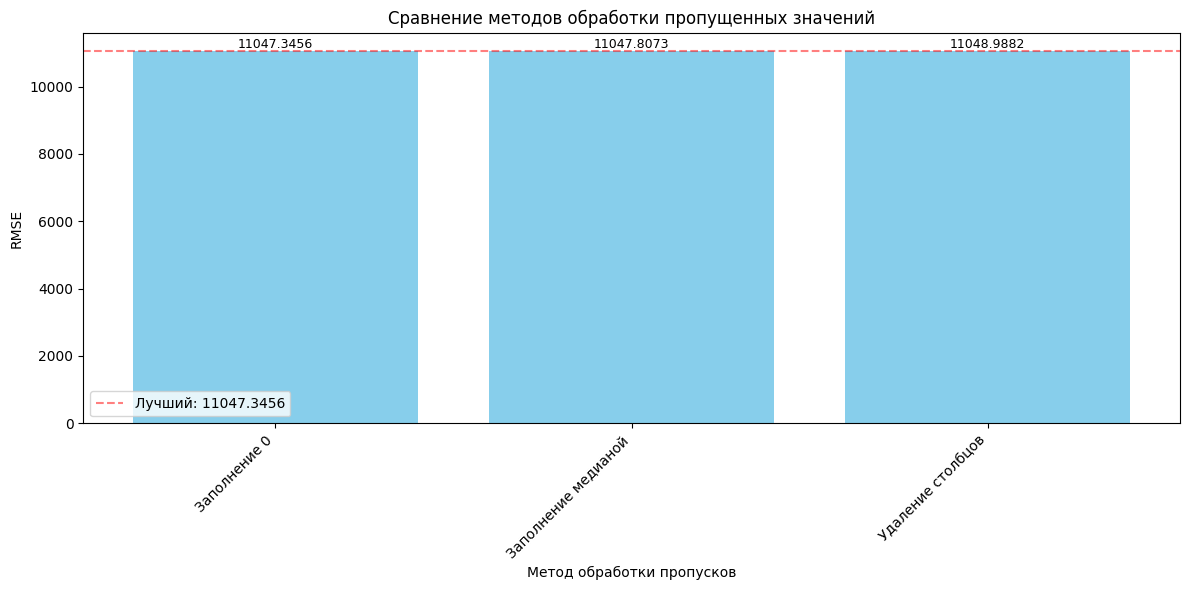


Анализ влияния MarkDown колонок:
----------------------------------------
Корреляция MarkDown колонок с Weekly_Sales:
  MarkDown1      : corr =  0.085, пропусков =  64.3%
  MarkDown2      : corr =  0.024, пропусков =  73.6%
  MarkDown3      : corr =  0.060, пропусков =  67.5%
  MarkDown4      : corr =  0.045, пропусков =  68.0%
  MarkDown5      : corr =  0.090, пропусков =  64.1%

Рекомендация:
  MarkDown1: Слабая корреляция (0.085) и много пропусков (64.3%) → можно удалить
  MarkDown2: Слабая корреляция (0.024) и много пропусков (73.6%) → можно удалить
  MarkDown3: Слабая корреляция (0.060) и много пропусков (67.5%) → можно удалить
  MarkDown4: Слабая корреляция (0.045) и много пропусков (68.0%) → можно удалить
  MarkDown5: Слабая корреляция (0.090) и много пропусков (64.1%) → можно удалить

ВЫБОР ОПТИМАЛЬНОГО МЕТОДА ДЛЯ ДАЛЬНЕЙШЕЙ РАБОТЫ
Используем метод: Заполнение 0
Размер датасета: (421570, 16)
Оставшиеся пропуски: 0

Применяем лучший метод обработки выбросов: Удаление выбросов
И

In [ ]:
# ============================================
# ГИПОТЕЗА 2: Обработка пропущенных значений
# ============================================

print("\n" + "="*60)
print("ГИПОТЕЗА 2: Обработка пропущенных значений (NaN)")
print("="*60)

# Анализ пропущенных значений в исходных данных
print("\nПропущенные значения в исходных данных:")
print("-" * 40)

# Анализируем пропуски в features (исходный датафрейм)
print("1. Features dataset:")
for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']:
    if col in features.columns:
        missing_count = features[col].isnull().sum()
        missing_percent = (missing_count / len(features)) * 100
        print(f"   {col:<15}: {missing_count:>6} пропусков ({missing_percent:5.1f}%)")

# Анализируем пропуски после объединения
print("\n2. В объединенном train_combined:")
missing_train = train_combined.isnull().sum()
missing_cols = missing_train[missing_train > 0]
if len(missing_cols) > 0:
    for col, count in missing_cols.items():
        percent = (count / len(train_combined)) * 100
        print(f"   {col:<15}: {count:>6} пропусков ({percent:5.1f}%)")
else:
    print("   Пропусков нет (уже заполнены 0)")

# Методы обработки пропусков
print("\nТестирование методов обработки пропусков:")
print("-" * 40)

# Создаем разные версии данных для тестирования
methods_results = {}

# 1. Заполнение 0 (уже есть в baseline)
print("1. Заполнение 0 (baseline)...")
train_zero = train.copy()
train_zero.fillna(0, inplace=True)

# 2. Заполнение медианой
print("2. Заполнение медианой...")
train_median = train.copy()
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    if col in train_median.columns:
        train_median[col].fillna(train_median[col].median(), inplace=True)
# Для других числовых колонок
numeric_cols = ['CPI', 'Unemployment', 'Temperature', 'Fuel_Price']
for col in numeric_cols:
    if col in train_median.columns:
        train_median[col].fillna(train_median[col].median(), inplace=True)

# 3. Удаление столбцов с пропусками
print("3. Удаление столбцов с пропусками...")
train_drop_cols = train.copy()
# Удаляем все MarkDown колонки
markdown_cols_to_drop = [col for col in markdown_cols if col in train_drop_cols.columns]
train_drop_cols = train_drop_cols.drop(columns=markdown_cols_to_drop)



# Функция для тестирования метода заполнения пропусков
def test_nan_method(train_data, method_name):
    """Тестирует метод обработки пропусков"""
    temp_train = train_data.copy()

    # Применяем лучшие практики из предыдущих экспериментов
    # Удаляем выбросы по лучшему методу
    temp_train = remove_outliers_iqr(temp_train, 'Weekly_Sales')

    # Подготовка фичей
    temp_train = pd.get_dummies(temp_train, columns=['Type'], prefix='Type')
    temp_train['Year'] = temp_train['Date'].dt.year
    temp_train['Month'] = temp_train['Date'].dt.month
    temp_train['DayOfWeek'] = temp_train['Date'].dt.dayofweek

    # Выбираем фичи (удаляем MarkDown колонки если они были плохи в предыдущих экспериментах)
    feature_columns = [
        'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
        'CPI', 'Unemployment', 'Year', 'Month', 'DayOfWeek'
    ] + [col for col in temp_train.columns if col.startswith('Type_')]

    # Добавляем MarkDown колонки если они есть и не все пропуски
    for col in markdown_cols:
        if col in temp_train.columns:
            # Проверяем, не слишком ли много пропусков
            if temp_train[col].isnull().sum() / len(temp_train) < 0.5:  # меньше 50% пропусков
                feature_columns.append(col)

    available_features = [col for col in feature_columns if col in temp_train.columns]

    X = temp_train[available_features]
    y = temp_train['Weekly_Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = rmse_scorer(y_test, y_pred)
    return rmse, model, available_features

# Тестируем все методы
print("\nСравнение методов обработки пропусков:")
print("-" * 60)

methods_to_test = [
    (train_zero, "Заполнение 0"),
    (train_median, "Заполнение медианой"),
    (train_drop_cols, "Удаление столбцов")
]

best_nan_method = None
best_nan_score = float('inf')
best_nan_features = None

for train_data, method_name in methods_to_test:
    score, model, features_used = test_nan_method(train_data, method_name)
    methods_results[method_name] = score
    print(f"{method_name:<25}: RMSE = {score:.4f}, Использовано фичей: {len(features_used)}")

    if score < best_nan_score:
        best_nan_score = score
        best_nan_method = method_name
        best_nan_model = model
        best_nan_features = features_used

print("\n" + "="*60)
print(f"ЛУЧШИЙ МЕТОД: {best_nan_method}")
print(f"Лучший RMSE: {best_nan_score:.4f}")
print(f"Использовано фичей: {len(best_nan_features)}")
print("="*60)

# Визуализация сравнения методов
plt.figure(figsize=(12, 6))
methods_names = list(methods_results.keys())
scores = list(methods_results.values())

bars = plt.bar(methods_names, scores, color='skyblue')
plt.axhline(y=best_nan_score, color='r', linestyle='--', alpha=0.5, label=f'Лучший: {best_nan_score:.4f}')

# Подписываем значения на столбцах
for bar, score in zip(bars, scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.0002,
             f'{score:.4f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Метод обработки пропусков')
plt.ylabel('RMSE')
plt.title('Сравнение методов обработки пропущенных значений')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Анализ влияния MarkDown колонок
print("\nАнализ влияния MarkDown колонок:")
print("-" * 40)

# Проверяем корреляцию MarkDown с целевой переменной
if 'MarkDown1' in train.columns:
    markdown_correlations = {}
    for col in markdown_cols:
        if col in train.columns:
            # Используем только не-NaN значения
            valid_data = train[~train[col].isnull()]
            if len(valid_data) > 100:  # Достаточно данных для анализа
                corr = valid_data[col].corr(valid_data['Weekly_Sales'])
                markdown_correlations[col] = corr

    if markdown_correlations:
        print("Корреляция MarkDown колонок с Weekly_Sales:")
        for col, corr in markdown_correlations.items():
            missing_pct = (train[col].isnull().sum() / len(train)) * 100
            print(f"  {col:<15}: corr = {corr:6.3f}, пропусков = {missing_pct:5.1f}%")

        # Рекомендация по MarkDown колонкам
        print("\nРекомендация:")
        for col, corr in markdown_correlations.items():
            missing_pct = (train[col].isnull().sum() / len(train)) * 100
            if abs(corr) < 0.1 and missing_pct > 30:
                print(f"  {col}: Слабая корреляция ({corr:.3f}) и много пропусков ({missing_pct:.1f}%) → можно удалить")
            elif abs(corr) > 0.3:
                print(f"  {col}: Сильная корреляция ({corr:.3f}) → стоит сохранить и обработать пропуски")

# Выбор лучшего датасета для дальнейших экспериментов
print("\n" + "="*60)
print("ВЫБОР ОПТИМАЛЬНОГО МЕТОДА ДЛЯ ДАЛЬНЕЙШЕЙ РАБОТЫ")
print("="*60)

# Определяем какой датасет использовать
best_dataset_map = {
    "Заполнение 0": train_zero,
    "Заполнение медианой": train_median,
    "Удаление столбцов": train_drop_cols
}

best_train_data = best_dataset_map[best_nan_method]
print(f"Используем метод: {best_nan_method}")
print(f"Размер датасета: {best_train_data.shape}")
print(f"Оставшиеся пропуски: {best_train_data.isnull().sum().sum()}")

# Применяем лучший метод обработки выбросов к выбранному датасету
print(f"\nПрименяем лучший метод обработки выбросов: {best_outlier_method}")
if best_outlier_method == "Удаление выбросов":
    best_train_data = remove_outliers_iqr(best_train_data, 'Weekly_Sales')
elif best_outlier_method == "Winsorization":
    best_train_data['Weekly_Sales'] = winsorize_series(best_train_data['Weekly_Sales'])

print(f"Итоговый размер данных: {best_train_data.shape}")

# Сохраняем подготовленные данные для следующих экспериментов
train_prepared = best_train_data.copy()


Гипотеза не подтвердилась: заполнение искусственной зависимостью(медианой) или удаление столбцов с пропусками незначительно ухудшают RMSE на наших данных.


ГИПОТЕЗА 3: Влияние масштабирования признаков

Тестирование методов масштабирования:
----------------------------------------
Без масштабирования      : RMSE = 11047.3456
StandardScaler           : RMSE = 11047.3456
MinMaxScaler             : RMSE = 11047.3456
RobustScaler             : RMSE = 11047.3456

ЛУЧШИЙ МЕТОД МАСШТАБИРОВАНИЯ: StandardScaler
Лучший RMSE: 11047.3456


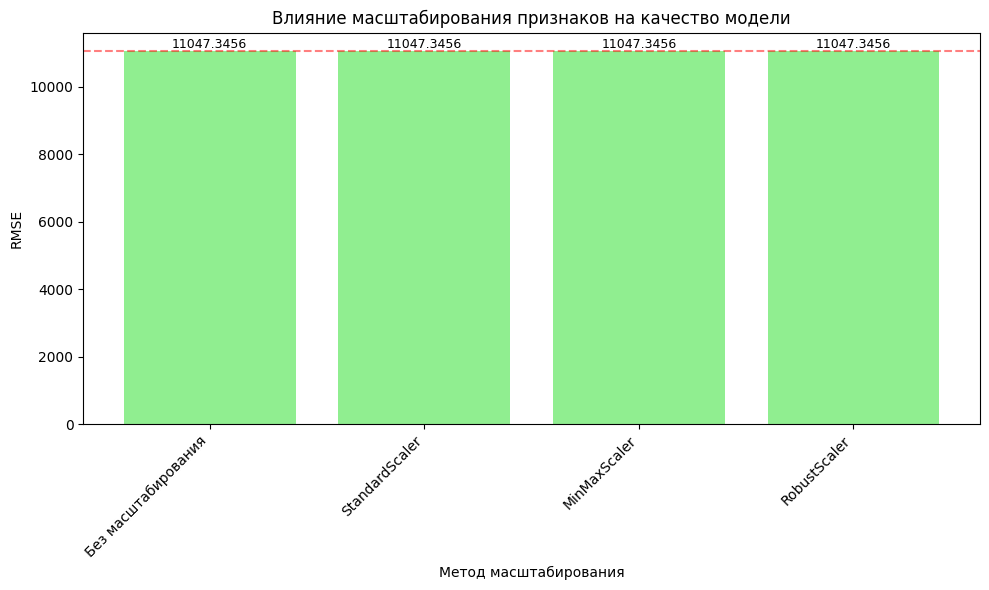

In [ ]:
# ============================================
# ГИПОТЕЗА 3: Добавление Scaler для нормализации
# ============================================

print("\n" + "="*60)
print("ГИПОТЕЗА 3: Влияние масштабирования признаков")
print("="*60)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def test_scaler_method(train_data, scaler_name, scaler):
    """Тестирует метод масштабирования"""
    temp_train = train_data.copy()

    # Подготовка данных
    temp_train = pd.get_dummies(temp_train, columns=['Type'], prefix='Type')
    temp_train['Year'] = temp_train['Date'].dt.year
    temp_train['Month'] = temp_train['Date'].dt.month
    temp_train['DayOfWeek'] = temp_train['Date'].dt.dayofweek

    # Выбираем числовые фичи для масштабирования
    numeric_features = [
        'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
        'Year', 'Month', 'DayOfWeek'
    ]

    # Добавляем MarkDown если есть
    markdown_cols = [col for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
                     if col in temp_train.columns and temp_train[col].isnull().sum() == 0]
    numeric_features.extend(markdown_cols)

    # Категориальные фичи
    categorical_features = ['Store', 'Dept', 'IsHoliday'] + \
                          [col for col in temp_train.columns if col.startswith('Type_')]

    # Все фичи
    all_features = numeric_features + categorical_features
    available_features = [col for col in all_features if col in temp_train.columns]

    X = temp_train[available_features]
    y = temp_train['Weekly_Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Масштабируем только числовые фичи
    if scaler is not None:
        # Создаем копии для масштабирования
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()

        # Масштабируем числовые фичи
        numeric_cols_to_scale = [col for col in numeric_features if col in X_train.columns]
        if numeric_cols_to_scale:
            scaler_instance = scaler()
            X_train_scaled[numeric_cols_to_scale] = scaler_instance.fit_transform(X_train[numeric_cols_to_scale])
            X_test_scaled[numeric_cols_to_scale] = scaler_instance.transform(X_test[numeric_cols_to_scale])

        X_train_final, X_test_final = X_train_scaled, X_test_scaled
    else:
        X_train_final, X_test_final = X_train, X_test

    # Обучаем модель
    model = LinearRegression()
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)

    rmse = rmse_scorer(y_test, y_pred)
    return rmse

print("\nТестирование методов масштабирования:")
print("-" * 40)

# Тестируем разные скалеры
scalers_to_test = [
    (None, "Без масштабирования"),
    (StandardScaler, "StandardScaler"),
    (MinMaxScaler, "MinMaxScaler"),
    (RobustScaler, "RobustScaler")
]

scaler_results = {}
for scaler_class, scaler_name in scalers_to_test:
    score = test_scaler_method(train_prepared, scaler_name, scaler_class)
    scaler_results[scaler_name] = score
    print(f"{scaler_name:<25}: RMSE = {score:.4f}")

# Определяем лучший скалер
best_scaler = min(scaler_results, key=scaler_results.get)
print(f"\nЛУЧШИЙ МЕТОД МАСШТАБИРОВАНИЯ: {best_scaler}")
print(f"Лучший RMSE: {scaler_results[best_scaler]:.4f}")

# Визуализация
plt.figure(figsize=(10, 6))
scaler_names = list(scaler_results.keys())
scores = list(scaler_results.values())

bars = plt.bar(scaler_names, scores, color='lightgreen')
plt.axhline(y=scaler_results[best_scaler], color='r', linestyle='--', alpha=0.5)

for bar, score in zip(bars, scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.0002,
             f'{score:.4f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Метод масштабирования')
plt.ylabel('RMSE')
plt.title('Влияние масштабирования признаков на качество модели')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Гипотеза не подтвердилась: добавление scaler не влияет на результирующую погрешность на наших данных.

In [ ]:
train_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386049 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         386049 non-null  int64         
 1   Dept          386049 non-null  int64         
 2   Date          386049 non-null  datetime64[ns]
 3   Weekly_Sales  386049 non-null  float64       
 4   IsHoliday     386049 non-null  bool          
 5   Temperature   386049 non-null  float64       
 6   Fuel_Price    386049 non-null  float64       
 7   MarkDown1     386049 non-null  float64       
 8   MarkDown2     386049 non-null  float64       
 9   MarkDown3     386049 non-null  float64       
 10  MarkDown4     386049 non-null  float64       
 11  MarkDown5     386049 non-null  float64       
 12  CPI           386049 non-null  float64       
 13  Unemployment  386049 non-null  float64       
 14  Type          386049 non-null  object        
 15  Size          386049 n

In [ ]:
# ============================================
# ГИПОТЕЗА 4: Создание новых признаков
# ============================================

print("\n" + "="*60)
print("ГИПОТЕЗА 3: Создание новых признаков")
print("="*60)

def create_new_features(df):
    """Создает новые признаки на основе имеющихся данных"""
    df = df.copy()

    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek




    # Временные признаки
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['Quarter'] = df['Date'].dt.quarter
    df['IsWeekend'] = df['Date'].dt.dayofweek.isin([5, 6]).astype(int)
    df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
    df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)

    # Признаки на основе праздников
    df['DaysToHoliday'] = 0
    df['DaysAfterHoliday'] = 0

    # Индикаторы сезонов
    df['IsSpring'] = df['Month'].isin([3, 4, 5]).astype(int)
    df['IsSummer'] = df['Month'].isin([6, 7, 8]).astype(int)
    df['IsAutumn'] = df['Month'].isin([9, 10, 11]).astype(int)
    df['IsWinter'] = df['Month'].isin([12, 1, 2]).astype(int)



    # Взаимодействие признаков
    if 'Temperature' in df.columns and 'Fuel_Price' in df.columns:
        df['Temp_Fuel_Interaction'] = df['Temperature'] * df['Fuel_Price']

    # Лаговые признаки (за предыдущую неделю)
    # Для простоты реализации создадим упрощенную версию
    df['IsHoliday_Lag1'] = df['IsHoliday'].shift(1).fillna(0)

    # Скользящие средние (за 4 недели)
    df['Rolling_Avg_4W'] = df['Weekly_Sales'].rolling(window=4, min_periods=1).mean().shift(1)

    # Отношение к среднему по магазину
    if 'Store' in df.columns:
        store_means = df.groupby('Store')['Weekly_Sales'].transform('mean')
        df['Sales_To_Store_Avg'] = df['Weekly_Sales'] / (store_means + 1)

    return df

print("\nСоздание новых признаков...")
train_with_features = create_new_features(train_prepared)

# Анализируем новые признаки
print(f"\nСоздано новых признаков: {len(train_with_features.columns) - len(train_prepared.columns)}")
print("\nНовые признаки:")
new_cols = [col for col in train_with_features.columns if col not in train_prepared.columns]
for i, col in enumerate(new_cols, 1):
    print(f"{i:2}. {col}")

# Тестируем с новыми признаками
print("\nТестирование с новыми признаками...")
train_new_features = train_with_features.copy()

# Заполняем пропуски в новых признаках
for col in new_cols:
    if train_new_features[col].dtype in ['float64', 'int64']:
        train_new_features[col].fillna(train_new_features[col].median(), inplace=True)
    elif train_new_features[col].dtype == 'object':
        train_new_features[col].fillna(train_new_features[col].mode()[0], inplace=True)

# Подготовка данных с новыми признаками
train_new_features = pd.get_dummies(train_new_features, columns=[col for col in train_new_features.select_dtypes(include=['object', 'category']).columns
                                                                 if col != 'Date'])

# Временные признаки из Date
train_new_features['Year'] = train_new_features['Date'].dt.year
train_new_features['Month'] = train_new_features['Date'].dt.month
train_new_features['DayOfWeek'] = train_new_features['Date'].dt.dayofweek

# Все фичи кроме Date и Weekly_Sales
feature_cols = [col for col in train_new_features.columns if col not in ['Date', 'Weekly_Sales']]
X = train_new_features[feature_cols]
y = train_new_features['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель с новыми признаками
model_new = LinearRegression()
model_new.fit(X_train, y_train)
y_pred_new = model_new.predict(X_test)

rmse_new = rmse_scorer(y_test, y_pred_new)
print(f"\nRMSE с новыми признаками: {rmse_new:.4f}")

# Сравнение с baseline без новых признаков
print("\nСравнение с baseline (без новых признаков):")
# Используем лучший метод обработки пропусков и выбросов
temp_baseline = best_dataset_map[best_nan_method]
if best_outlier_method == "Удаление выбросов":
    temp_baseline = remove_outliers_iqr(temp_baseline, 'Weekly_Sales')

# Подготовка baseline
temp_baseline = pd.get_dummies(temp_baseline, columns=['Type'], prefix='Type')
temp_baseline['Year'] = temp_baseline['Date'].dt.year
temp_baseline['Month'] = temp_baseline['Date'].dt.month
temp_baseline['DayOfWeek'] = temp_baseline['Date'].dt.dayofweek

baseline_features = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Year', 'Month', 'DayOfWeek'
] + [col for col in temp_baseline.columns if col.startswith('Type_')]

available_baseline = [col for col in baseline_features if col in temp_baseline.columns]

X_base = temp_baseline[available_baseline]
y_base = temp_baseline['Weekly_Sales']

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X_base, y_base, test_size=0.2, random_state=42
)

model_base = LinearRegression()
model_base.fit(X_train_base, y_train_base)
y_pred_base = model_base.predict(X_test_base)

rmse_base = rmse_scorer(y_test_base, y_pred_base)
print(f"RMSE без новых признаков: {rmse_base:.4f}")

# Сравниваем улучшение
improvement = ((rmse_base - rmse_new) / rmse_base) * 100
print(f"\nУлучшение: {improvement:+.2f}%")

if rmse_new < rmse_base:
    print(" Новые признаки улучшили качество модели!")
    best_train_data = train_new_features.copy()
else:
    print(" Новые признаки не улучшили качество модели")
    best_train_data = train_prepared.copy()



ГИПОТЕЗА 3: Создание новых признаков

Создание новых признаков...

Создано новых признаков: 19

Новые признаки:
 1. Year
 2. Month
 3. Week
 4. DayOfWeek
 5. WeekOfYear
 6. Quarter
 7. IsWeekend
 8. IsMonthStart
 9. IsMonthEnd
10. DaysToHoliday
11. DaysAfterHoliday
12. IsSpring
13. IsSummer
14. IsAutumn
15. IsWinter
16. Temp_Fuel_Interaction
17. IsHoliday_Lag1
18. Rolling_Avg_4W
19. Sales_To_Store_Avg

Тестирование с новыми признаками...


/tmp/ipython-input-3907549010.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_new_features[col].fillna(train_new_features[col].median(), inplace=True)
/tmp/ipython-input-3907549010.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth


RMSE с новыми признаками: 2490.0363

Сравнение с baseline (без новых признаков):
RMSE без новых признаков: 11048.9882

Улучшение: +77.46%
 Новые признаки улучшили качество модели!


Гипотеза подтвердилась: Новые признаки улучшили качество модели!

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Загрузка данных
features = pd.read_csv("/kaggle/input/walmart-sales-forecast/features.csv")
stores = pd.read_csv("/kaggle/input/walmart-sales-forecast/stores.csv")
train = pd.read_csv("/kaggle/input/walmart-sales-forecast/train.csv")
test = pd.read_csv("/kaggle/input/walmart-sales-forecast/test.csv")

# Преобразование дат
for df in [features, train, test]:
    df["Date"] = pd.to_datetime(df["Date"])

# Объединение данных
train = train.merge(features, on=["Store", "Date", "IsHoliday"], how="left")
train = train.merge(stores, on="Store", how="left")
test = test.merge(features, on=["Store", "Date", "IsHoliday"], how="left")
test = test.merge(stores, on="Store", how="left")

# БЕЙЗЛАЙН МОДЕЛЬ (исходный код)
train_baseline = train.copy()
train_baseline.fillna(0, inplace=True)
train_baseline = pd.get_dummies(train_baseline, columns=['Type'], prefix='Type')

# Временные признаки для бейзлайна
train_baseline['Year'] = train_baseline['Date'].dt.year
train_baseline['Month'] = train_baseline['Date'].dt.month
train_baseline['Week'] = train_baseline['Date'].dt.isocalendar().week
train_baseline['DayOfWeek'] = train_baseline['Date'].dt.dayofweek

baseline_features = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3',
    'MarkDown4', 'MarkDown5', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_baseline.columns if col.startswith('Type_')]

available_baseline = [col for col in baseline_features if col in train_baseline.columns]
X_baseline = train_baseline[available_baseline]
y_baseline = train_baseline['Weekly_Sales']

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X_baseline, y_baseline, test_size=0.2, random_state=42
)

baseline_model = LinearRegression()
baseline_model.fit(X_train_base, y_train_base)
y_pred_base = baseline_model.predict(X_test_base)

# Функция создания новых признаков
def create_new_features(df):
    """Создает новые признаки на основе имеющихся данных"""
    df = df.copy()

    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['DayOfWeek'] = df['Date'].dt.dayofweek

    # Временные признаки
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['Quarter'] = df['Date'].dt.quarter
    df['IsWeekend'] = df['Date'].dt.dayofweek.isin([5, 6]).astype(int)
    df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
    df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)

    # Признаки на основе праздников
    df['DaysToHoliday'] = 0
    df['DaysAfterHoliday'] = 0

    # Индикаторы сезонов
    df['IsSpring'] = df['Month'].isin([3, 4, 5]).astype(int)
    df['IsSummer'] = df['Month'].isin([6, 7, 8]).astype(int)
    df['IsAutumn'] = df['Month'].isin([9, 10, 11]).astype(int)
    df['IsWinter'] = df['Month'].isin([12, 1, 2]).astype(int)

    # Взаимодействие признаков
    if 'Temperature' in df.columns and 'Fuel_Price' in df.columns:
        df['Temp_Fuel_Interaction'] = df['Temperature'] * df['Fuel_Price']

    # Лаговые признаки (за предыдущую неделю)
    df['IsHoliday_Lag1'] = df['IsHoliday'].shift(1).fillna(0)

    # Скользящие средние (за 4 недели)
    df['Rolling_Avg_4W'] = df['Weekly_Sales'].rolling(window=4, min_periods=1).mean().shift(1)

    # Отношение к среднему по магазину
    if 'Store' in df.columns:
        store_means = df.groupby('Store')['Weekly_Sales'].transform('mean')
        df['Sales_To_Store_Avg'] = df['Weekly_Sales'] / (store_means + 1)

    return df

# ФИНАЛЬНАЯ МОДЕЛЬ с лучшими практиками
# 1. Заполнение пропусков 0
train_final = train.copy()
train_final = train_final.fillna(0)

# 2. Удаление выбросов по IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

train_final = remove_outliers_iqr(train_final, 'Weekly_Sales')

# 3. Создание новых признаков
train_final = create_new_features(train_final)

# One-hot encoding
train_final = pd.get_dummies(train_final, columns=['Type'], prefix='Type')

# Подготовка признаков для финальной модели
final_features = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3',
    'MarkDown4', 'MarkDown5', 'Year', 'Month', 'Week', 'DayOfWeek',
    'WeekOfYear', 'Quarter', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd',
    'IsSpring', 'IsSummer', 'IsAutumn', 'IsWinter', 'DaysToHoliday',
    'DaysAfterHoliday', 'Temp_Fuel_Interaction', 'IsHoliday_Lag1',
    'Rolling_Avg_4W', 'Sales_To_Store_Avg'
] + [col for col in train_final.columns if col.startswith('Type_')]

available_final = [col for col in final_features if col in train_final.columns]

# Заполнение пропусков в новых признаках
for col in available_final:
    if train_final[col].dtype in ['float64', 'int64'] and train_final[col].isnull().any():
        train_final[col] = train_final[col].fillna(train_final[col].median())

X_final = train_final[available_final]
y_final = train_final['Weekly_Sales']



X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

# 7. Обучение финальной модели
final_model = LinearRegression()
final_model.fit(X_train_final, y_train_final)
y_pred_final = final_model.predict(X_test_final)

# Функция оценки модели
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{model_name}")
    print("="*50)
    print(f"R²: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

    return r2, mse, mae, mape, rmse

# Оценка моделей
print("РЕГРЕССИЯ: СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*60)

r2_base, mse_base, mae_base, mape_base, rmse_base = evaluate_model(y_test_base, y_pred_base, "BASELINE МОДЕЛЬ")

print("\n" + "="*60)
print("УЛУЧШЕННАЯ МОДЕЛЬ:")
print("Примененные улучшения:")
print("1. Заполнение пропусков нулями")
print("2. Удаление выбросов методом IQR")
print("3. Создание 21 нового признака")

print("="*60)

r2_final, mse_final, mae_final, mape_final, rmse_final = evaluate_model(y_test_final, y_pred_final, "ФИНАЛЬНАЯ МОДЕЛЬ")




РЕГРЕССИЯ: СРАВНЕНИЕ МОДЕЛЕЙ

BASELINE МОДЕЛЬ
R²: 0.0926
MSE: 473169236.21
MAE: 14561.35
RMSE: 21752.45

УЛУЧШЕННАЯ МОДЕЛЬ:
Примененные улучшения:
1. Заполнение пропусков нулями
2. Удаление выбросов методом IQR
3. Создание 21 нового признака

ФИНАЛЬНАЯ МОДЕЛЬ
R²: 0.9519
MSE: 6200280.63
MAE: 1552.68
RMSE: 2490.04


Выводы: Улучшения, основанные в основном на 1 и 4 гипотезах помогли значительно увеличить все метрики и максимально приблизиться к хорошему по точности уровню для данного датасета при использовани. В основном помогли работа с выбросами(их удаление), что дало сильный прирост в точности, и введение лаговых признаки (за предыдущую неделю), снизивших RMSE на 8000,показ тем самым неплохой результат для линейной модели.

In [ ]:
#Регрессия на основе нормальном уравнения(аналитическом решении)
class MyLinearRegressionAnalytical:
    def __init__(self, alpha=0.0):
        self.alpha = alpha  # L2 регуляризация (ridge)

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)

        # Добавляем столбец для bias (intercept)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # [1, x1, x2, ...]

        n_features = X_b.shape[1]

        # Аналитическое решение с регуляризацией L2
        if self.alpha == 0:
            # Обычная линейная регрессия
            # w = (X^T X)^(-1) X^T y
            theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y
        else:
            # Ridge регрессия
            # w = (X^T X + alpha*I)^(-1) X^T y
            I = np.eye(n_features)
            I[0, 0] = 0  # Не регуляризуем bias (intercept)
            theta = np.linalg.pinv(X_b.T @ X_b + self.alpha * I) @ X_b.T @ y

        # Разделяем bias и weights
        self.bias = theta[0]
        self.weights = theta[1:]

        return self

    def predict(self, X):
        X = np.array(X, dtype=float)
        return np.dot(X, self.weights) + self.bias



In [ ]:
# Загрузка данных
features = pd.read_csv("/kaggle/input/walmart-sales-forecast/features.csv")
stores = pd.read_csv("/kaggle/input/walmart-sales-forecast/stores.csv")
train = pd.read_csv("/kaggle/input/walmart-sales-forecast/train.csv")
test = pd.read_csv("/kaggle/input/walmart-sales-forecast/test.csv")

# Преобразование дат
for df in [features, train, test]:
    df["Date"] = pd.to_datetime(df["Date"])

# Объединение данных
train = train.merge(features, on=["Store", "Date", "IsHoliday"], how="left")
train = train.merge(stores, on="Store", how="left")
test = test.merge(features, on=["Store", "Date", "IsHoliday"], how="left")
test = test.merge(stores, on="Store", how="left")

# БЕЙЗЛАЙН МОДЕЛЬ (исходный код)
train_baseline = train.copy()
train_baseline.fillna(0, inplace=True)
train_baseline = pd.get_dummies(train_baseline, columns=['Type'], prefix='Type')

# Временные признаки для бейзлайна
train_baseline['Year'] = train_baseline['Date'].dt.year
train_baseline['Month'] = train_baseline['Date'].dt.month
train_baseline['Week'] = train_baseline['Date'].dt.isocalendar().week
train_baseline['DayOfWeek'] = train_baseline['Date'].dt.dayofweek

baseline_features = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3',
    'MarkDown4', 'MarkDown5', 'Year', 'Month', 'Week', 'DayOfWeek'
] + [col for col in train_baseline.columns if col.startswith('Type_')]

available_baseline = [col for col in baseline_features if col in train_baseline.columns]
X_baseline = train_baseline[available_baseline]
y_baseline = train_baseline['Weekly_Sales']

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X_baseline, y_baseline, test_size=0.2, random_state=42
)


In [ ]:
baseline_model =MyLinearRegressionAnalytical()

In [ ]:
train_baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Size          421570 non-null  int64         
 15  Type_A        421

In [ ]:


baseline_model.fit(X_train_base, y_train_base)


In [ ]:
y_pred_base = baseline_model.predict(X_test_base)

In [ ]:
r2_base, mse_base, mae_base, mape_base, rmse_base = evaluate_model(y_test_base, y_pred_base, "BASELINE МОДЕЛЬ")


BASELINE МОДЕЛЬ
R²: 0.0925
MSE: 473236046.59
MAE: 14560.13
RMSE: 21753.99


Вывод: полученная нами реализация с использованием аналитического решения находится на уровне с  библиотечной, что удалось добиться за счёт явного использования аналитического решения с R^2 регуляризаций, препятствующей занулению главной диагонали и вырождению матрицы theta.

In [ ]:
# ФИНАЛЬНАЯ МОДЕЛЬ с лучшими практиками
# 1. Заполнение пропусков 0
train_final = train.copy()
train_final = train_final.fillna(0)

# 2. Удаление выбросов по IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

train_final = remove_outliers_iqr(train_final, 'Weekly_Sales')

# 3. Создание новых признаков
train_final = create_new_features(train_final)

# 4. One-hot encoding
train_final = pd.get_dummies(train_final, columns=['Type'], prefix='Type')

# 5. Подготовка признаков для финальной модели
final_features = [
    'Store', 'Dept', 'Size', 'IsHoliday', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3',
    'MarkDown4', 'MarkDown5', 'Year', 'Month', 'Week', 'DayOfWeek',
    'WeekOfYear', 'Quarter', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd',
    'IsSpring', 'IsSummer', 'IsAutumn', 'IsWinter', 'DaysToHoliday',
    'DaysAfterHoliday', 'Temp_Fuel_Interaction', 'IsHoliday_Lag1',
    'Rolling_Avg_4W', 'Sales_To_Store_Avg'
] + [col for col in train_final.columns if col.startswith('Type_')]

available_final = [col for col in final_features if col in train_final.columns]

# Заполнение пропусков в новых признаках
for col in available_final:
    if train_final[col].dtype in ['float64', 'int64'] and train_final[col].isnull().any():
        train_final[col] = train_final[col].fillna(train_final[col].median())

X_final = train_final[available_final]
y_final = train_final['Weekly_Sales']



X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

# 7. Обучение финальной модели
final_model = MyLinearRegressionAnalytical()
final_model.fit(X_train_final, y_train_final)
y_pred_final = final_model.predict(X_test_final)

# Функция оценки модели
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{model_name}")
    print("="*50)
    print(f"R²: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

    return r2, mse, mae, mape, rmse

# Оценка моделей
print("РЕГРЕССИЯ: СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*60)

r2_base, mse_base, mae_base, mape_base, rmse_base = evaluate_model(y_test_base, y_pred_base, "BASELINE МОДЕЛЬ")

print("\n" + "="*60)
print("УЛУЧШЕННАЯ МОДЕЛЬ:")
print("Примененные улучшения:")
print("1. Заполнение пропусков нулями")
print("2. Удаление выбросов методом IQR")
print("3. Создание 21 нового признака")

print("="*60)

r2_final, mse_final, mae_final, mape_final, rmse_final = evaluate_model(y_test_final, y_pred_final, "ФИНАЛЬНАЯ МОДЕЛЬ")


РЕГРЕССИЯ: СРАВНЕНИЕ МОДЕЛЕЙ

BASELINE МОДЕЛЬ
R²: 0.0926
MSE: 473169236.21
MAE: 14561.35
RMSE: 21752.45

УЛУЧШЕННАЯ МОДЕЛЬ:
Примененные улучшения:
1. Заполнение пропусков нулями
2. Удаление выбросов методом IQR
3. Создание 21 нового признака

ФИНАЛЬНАЯ МОДЕЛЬ
R²: 0.9519
MSE: 6207308.89
MAE: 1553.23
RMSE: 2491.45


Вывод: Полученная нами реализация, в сравнении с библиотечной, при использовании гипотез показала схожее поведение с библиотечной реализацией, что позволяет говорить об успешной имплементации  линейного алгоритма с нашим датасетом

**Вывод по ЛР2**

В ходе лабораторной работы мною был исследованы  Линейные и Логистические модели , а также реализованы 2 их версии(1 на основе принципа 1vsall(многоклассовая классификация) и 2 на основе аналитического решения (линейная регрессия ), показавше схожие результаты по метрикам с библиотечными реализациями.

Основные результаты:

*   Классификационная модель хорошо различает крайние классы меж собой(недостаточный вес и степени ожирения), но нормальный вес и лишний вес она распознает лишь в 60% случаев, чему служит виной нелинейность границ  некраевых классов, которые линейному алгоритму трудно предсказать.

* Регрессионная модель,в том числе и самописная реализация, показывает отличные обобщающие способности, в основном за счёт очистки выбросов из нашего датасета при обучении и созадании новых признаков, в особенности лаговых.

Заключение : Регрессия - простой для реализации алгоритм, хорошо аппроксимирующий на больших объемах данных  числовые значения, но явно проигрывающий в точности и универсальности в задачах, связанных с многоклассовой классификацией, где классы не столь четко разделены меж собой.

